# Project: TMDB Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

#### Analyzing the TMDB movie dataset

Questions posed -   
Which Genre has the highset movie releases?  
Which movie get the highest or lowest votes?  
Which movie and director has the highest vote average?  
Which movie has shortest and longest runtime?  
Movies with highest and lowest - budget and revenue?  


What you did to investigate those questions?   
Assesed the data thoroughly in order to understand what questions could be asked from the data 

<a id='intro'></a>
## Introduction


In [686]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [687]:
df = pd.read_csv("tmdb-movies.csv")

In [688]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


### Assessing the data

In [689]:
df.shape

(10866, 21)

In [690]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [691]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [692]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [693]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### Cleaning the data 

In [694]:
# check for duplicates and drop it 

df.duplicated().sum()

1

In [695]:
df.drop_duplicates(inplace=True)

In [696]:
# re-check there are no duplicates

df.duplicated().sum()

0

In [697]:
#Drop columns that are not needed

df.drop(['tagline', 'homepage','overview','production_companies','keywords'], axis=1,inplace=True)

In [698]:
df.dtypes

id                  int64
imdb_id            object
popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
director           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

In [699]:
#rows with null values

df.isna().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [700]:
# drop rows with null values

df.dropna(how="any",inplace=True)

In [701]:
df.isna().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Q1. Which Genre has the highset movie releases?

In [616]:
#make a function that will split the string and return the count of each genre

def count_genre(x):
    
    #concatenate all the rows of the genres
    data_plot = df[x].str.cat(sep = '|')
    
    #using split function 
    data = pd.Series(data_plot.split('|'))
    
    #conts each of the genre and return
    info = data.value_counts(ascending=False)
    return info


In [617]:
#call the function for counting the movies of each genre

total_genre_movies = count_genre('genres')

In [618]:
total_genre_movies

Drama              4744
Comedy             3775
Thriller           2902
Action             2371
Romance            1708
Horror             1636
Adventure          1463
Crime              1353
Science Fiction    1217
Family             1213
Fantasy             905
Mystery             808
Animation           662
Documentary         470
Music               399
History             330
War                 268
Foreign             184
Western             164
TV Movie            162
dtype: int64

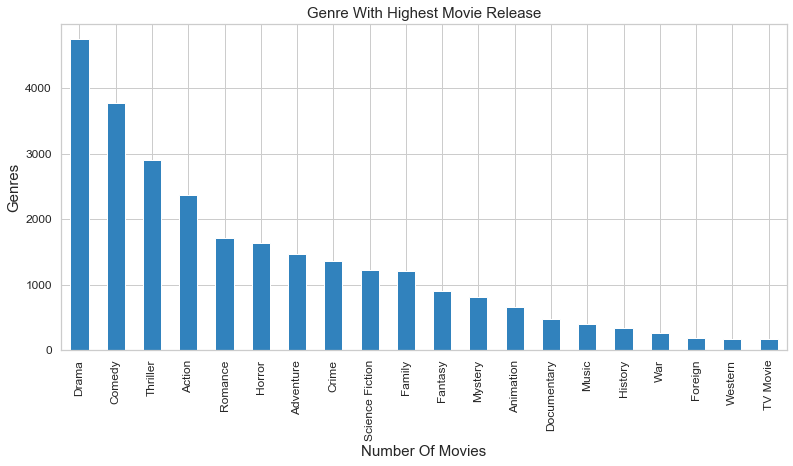

In [619]:
#using plot function for 'genre vs number of movies'

total_genre_movies.plot(kind= 'bar',figsize = (13,6),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot

plt.title("Genre With Highest Movie Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=15)
plt.ylabel("Genres",fontsize= 15)
sns.set_style("darkgrid")

### Conclusion: We can see that genre Drama has the highest number of movie release followed by comedy, thriller and action

### Research Q2. Which movie get the highest or lowest votes?

In [713]:
# making this function to answer few research questions below that include finidng min and max from a column

#idxmax() function returns index of first occurrence of maximum over requested axis
#idxmin() function returns index of first occurrence of minimum over requested axis

def minmax(x):
    
    #function 'idmax' to find the index of highest value of a column
    max_index = df[x].idxmax()
    
    #function 'idmin' to find the index of lowest value of a column
    min_index = df[x].idxmin()
    
    high = pd.DataFrame(df.loc[max_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    
    print("Movie with the Highest "+ x + " : ",df['original_title'][max_index])
    print("Movie with the Lowest "+ x + "  : ",df['original_title'][min_index])
    
    return pd.concat([high,low],axis = 1)

In [714]:
#call the minmax function

minmax('vote_average')

Movie with the Highest vote_average :  The Story of Film: An Odyssey
Movie with the Lowest vote_average  :  Transmorphers


,3894,7772
id,125336,25055
imdb_id,tt2044056,tt0960835
popularity,0.006925,0.12112
budget,NaN,NaN
revenue,0,0
original_title,The Story of Film: An Odyssey,Transmorphers
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...
director,Mark Cousins,Leigh Scott
runtime,900,86
genres,Documentary,Action|Adventure|Science Fiction


### Research Q3. Which movie and director has the highest vote average?

In [715]:
# group by -> movie title -"original title", to get the director and their vote average
# sort desc toget highest value on top 

highest_avg_vote = df.groupby("original_title")[["director","vote_average"]].max().sort_values(by='vote_average',ascending=False)


In [716]:
highest_avg_vote

,director,vote_average
original_title,,
The Story of Film: An Odyssey,Mark Cousins,9.2
Black Mirror: White Christmas,Carl Tibbetts,8.8
Pink Floyd: Pulse,David Mallet,8.7
Queen - Rock Montreal,Saul Swimmer,8.5
The Art of Flight,Curt Morgan,8.5
...,...,...
Superbabies: Baby Geniuses 2,Bob Clark,2.1
Birdemic: Shock and Terror,James Nguyen,2.1
Jurassic Shark,Brett Kelly,2.0


### Research Q4. Which movie has shortest and longest runtime?

In [722]:
# it is not possible to have "0" as runtime, so update it with NaN

df['runtime'] = df['runtime'].replace(0,np.NAN)
minmax('runtime')

Movie with the Highest runtime :  The Story of Film: An Odyssey
Movie with the Lowest runtime  :  Batman: Strange Days


,3894,1112
id,125336,264170
imdb_id,tt2044056,tt3643208
popularity,0.006925,0.202776
budget,NaN,NaN
revenue,0,0
original_title,The Story of Film: An Odyssey,Batman: Strange Days
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Kevin Conroy|Brian George|Tara Strong
director,Mark Cousins,Bruce Timm
runtime,900,3
genres,Documentary,Action|Animation


### The Story of Film: An Odyssey had the Highest runtime while Batman: Strange Days had the Lowest runtime

### Research Q5. Movies with highest and lowest - budget and revenue? 

In [723]:
df['budget'] = df['budget'].replace(0,np.NAN)
minmax('budget')

Movie with the Highest budget :  The Warrior's Way
Movie with the Lowest budget  :  Fear Clinic


,2244,1151
id,46528,287524
imdb_id,tt1032751,tt2165765
popularity,0.25054,0.177102
budget,4.25e+08,1
revenue,11087569,0
original_title,The Warrior's Way,Fear Clinic
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Thomas Dekker|Robert Englund|Cleopatra Coleman...
director,Sngmoo Lee,Robert Hall
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Horror


### The Warrior's Way had the highest budget while Fear Clinic had the lowest budget

In [724]:
# using the minmax function created above to find the max and min revenue

minmax('revenue')

Movie with the Highest revenue :  Avatar
Movie with the Lowest revenue  :  Wild Card


,1386,48
id,19995,265208
imdb_id,tt0499549,tt2231253
popularity,9.43277,2.93234
budget,2.37e+08,3e+07
revenue,2781505847,0
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
director,James Cameron,Simon West
runtime,162,92
genres,Action|Adventure|Fantasy|Science Fiction,Thriller|Crime|Drama


### We now know Movie with the Highest revenue was  Avatar  while Movie with the Lowest revenue  was  Wild Card

In [725]:
#make a plot which contain top 10 highest budget movies

#sort the budget column in decending order and store it in the new dataframe

info = pd.DataFrame(df['budget'].sort_values(ascending = False))

info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 budget movies data from the list and dataframe

x = list(data[:10])
y = list(info['budget'][:10])

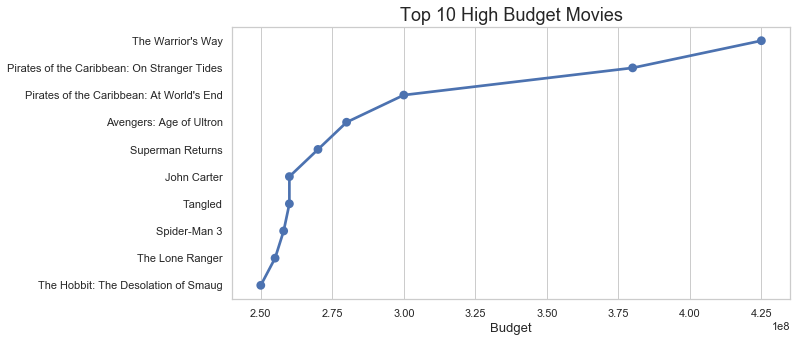

In [726]:
#plot the figure and setup the title and labels

ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 18)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("whitegrid")

#### Conclusion: Now we know the top 10 high budget movies with The Warrior's Way topping the list


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

### Conclusions from TMDB Movie data

Drama has the highest number of movie release

Movie with the Highest vote_average :  The Story of Film: An Odyssey
Movie with the Lowest vote_average  :  Transmorphers
    
Movie - The Story of Film: An Odyssey 
by Director Mark Cousin has the highest vote average 9.2
    
Movie with the Highest runtime :  The Story of Film: An Odyssey
Movie with the Lowest runtime  :  Batman: Strange Days
        
Movie with the Highest budget :  The Warrior's Way
Movie with the Lowest budget  :  Fear Clinic
    
Movie with the Highest revenue :  Avatar
Movie with the Lowest revenue  :  Wild Card
    


### Limitations

Removing null values, could have resulted in loss of key data   

No currency was specified for budget/revenue, results could be biased 